In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
df = pd.read_csv("sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values:\n", df.nunique())


Shape: (732, 15)

Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']

Data Types:
 Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

Missing Values:
 Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

Unique Values:
 Unnamed: 0.1    732
Unnamed: 0      732
Text            707
Sentiment       279
Timestamp       683
User  

In [ ]:

df = df.drop_duplicates()

df['Sentiment'] = df['Sentiment'].str.lower().str.strip()

df['Text'] = df['Text'].apply(lambda x: len(x.split()))

df[['Text', 'Sentiment', 'Text']].head()


,Text,Sentiment,Text
0,7,positive,7
1,5,negative,5
2,6,positive,6
3,6,positive,6
4,8,neutral,8


In [ ]:
print(df['Likes'].describe())
print("\nSentiment Value Counts:")
print(df['Sentiment'].value_counts())
print("\nAverage Review Length by Sentiment:")
print(df.groupby('Sentiment')['Text'].mean())


count    732.000000
mean      42.901639
std       14.089848
min       10.000000
25%       34.750000
50%       43.000000
75%       50.000000
max       80.000000
Name: Likes, dtype: float64

Sentiment Value Counts:
Sentiment
positive                45
joy                     44
excitement              37
contentment             19
neutral                 18
                        ..
celestial wonder         1
nature's beauty          1
thrilling journey        1
whispers of the past     1
relief                   1
Name: count, Length: 191, dtype: int64

Average Review Length by Sentiment:
Sentiment
acceptance        10.625
accomplishment    13.000
admiration        11.500
adoration          8.000
adrenaline         9.000
                   ...  
winter magic      22.000
wonder            14.000
wonderment        11.000
yearning          21.500
zest              17.500
Name: Text, Length: 191, dtype: float64


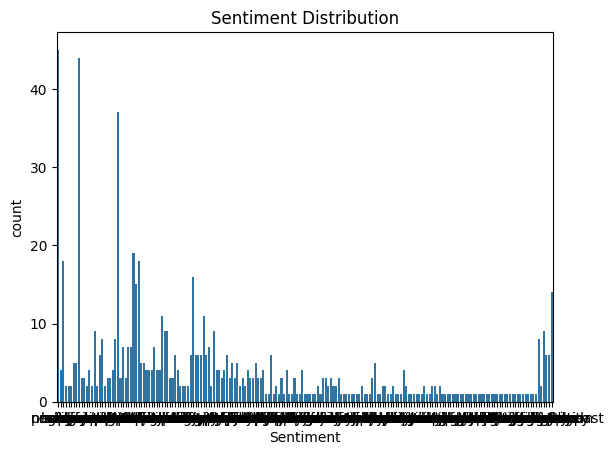

In [ ]:
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


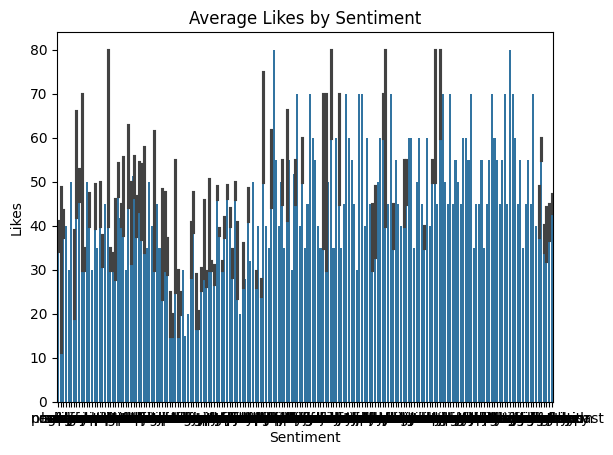

In [ ]:
sns.barplot(x='Sentiment', y='Likes', data=df, estimator='mean')
plt.title("Average Likes by Sentiment")
plt.show()


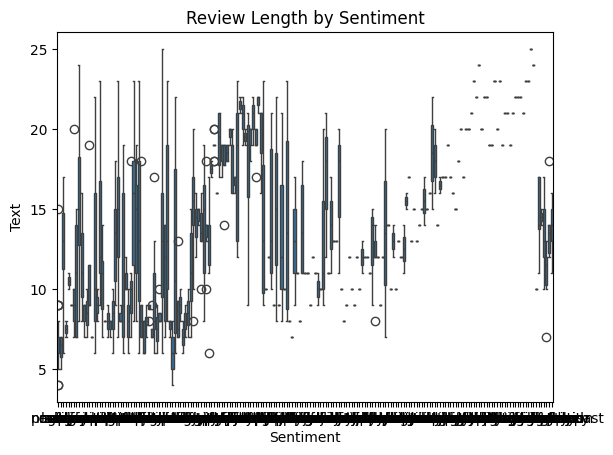

In [ ]:
sns.boxplot(x='Sentiment', y='Text', data=df)
plt.title("Review Length by Sentiment")
plt.show()


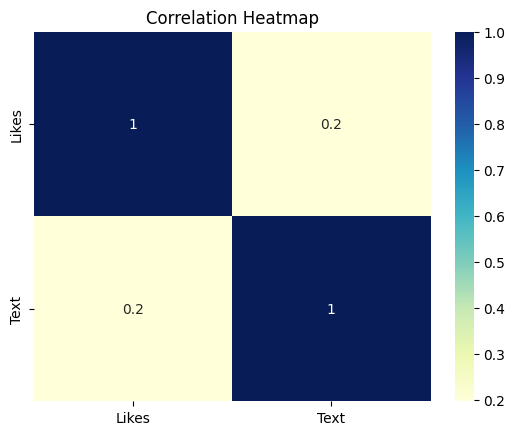

In [ ]:
sns.heatmap(df[['Likes', 'Text']].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
print("\n--- Relationships ---")
corr = df[['Likes','Text']].corr().iloc[0,1]
print("🔹 Correlation between likes & text length:", round(corr, 2))


--- Relationships ---
🔹 Correlation between likes & text length: 0.2


In [ ]:
print("🔹 Total Reviews:", len(df))
print("🔹 Unique Sentiments:", df['Sentiment'].unique())
print("🔹 Most Common Sentiment:", df['Sentiment'].mode()[0])
print("🔹 Average Likes per Review:", round(df['Likes'].mean(), 2))


🔹 Total Reviews: 732
🔹 Unique Sentiments: ['positive' 'negative' 'neutral' 'anger' 'fear' 'sadness' 'disgust'
 'happiness' 'joy' 'love' 'amusement' 'enjoyment' 'admiration' 'affection'
 'awe' 'disappointed' 'surprise' 'acceptance' 'adoration' 'anticipation'
 'bitter' 'calmness' 'confusion' 'excitement' 'kind' 'pride' 'shame'
 'elation' 'euphoria' 'contentment' 'serenity' 'gratitude' 'hope'
 'empowerment' 'compassion' 'tenderness' 'arousal' 'enthusiasm'
 'fulfillment' 'reverence' 'despair' 'grief' 'loneliness' 'jealousy'
 'resentment' 'frustration' 'boredom' 'anxiety' 'intimidation'
 'helplessness' 'envy' 'regret' 'curiosity' 'indifference' 'numbness'
 'melancholy' 'nostalgia' 'ambivalence' 'determination' 'zest' 'hopeful'
 'proud' 'grateful' 'empathetic' 'compassionate' 'playful' 'free-spirited'
 'inspired' 'confident' 'bitterness' 'yearning' 'fearful' 'apprehensive'
 'overwhelmed' 'jealous' 'devastated' 'frustrated' 'envious' 'dismissive'
 'thrill' 'bittersweet' 'overjoyed' 'inspirati

In [ ]:
print("\n--- Trends & Anomalies ---")
max_likes = df['Likes'].max()
min_likes = df['Likes'].min()
print("🔹 Highest Likes:", max_likes)
print("🔹 Lowest Likes:", min_likes)

longest_review = df.loc[df['Text'].idxmax(), 'Text']
print("🔹 Longest Review:", longest_review)



--- Trends & Anomalies ---
🔹 Highest Likes: 80.0
🔹 Lowest Likes: 10.0
🔹 Longest Review: 25


In [ ]:
print("\n--- Implications for Modeling ---")
if df['Sentiment'].value_counts().max() / len(df) > 0.6:
    print("⚠️ Data is slightly imbalanced — consider balancing classes for ML model.")
else:
    print("✅ Sentiment data looks balanced.")

if corr > 0:
    print("✅ Longer reviews tend to get slightly more likes.")
else:
    print("ℹ️ No strong relationship between review length and likes.")



--- Implications for Modeling ---
✅ Sentiment data looks balanced.
✅ Longer reviews tend to get slightly more likes.
